# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('07-x_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('07-x_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('07-y_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('07-y_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1985,0.237848,-12.455758,22.268440,0.013656,-0.002091,0.061581,27.550224,-3.736580,17.892195,-16.777225,...,8.377280,626.772583,1403.625244,-107.736900,1645.360718,1143.465454,-111.592857,2671.746338,1004.007019,-114.019333
1042,0.096896,-13.843244,21.239864,-0.007048,0.002401,0.023190,27.083162,-1.019235,17.894165,-6.893274,...,3.565492,652.476868,1419.516357,-169.802216,1668.297729,1174.426392,-172.371796,2655.321777,986.865784,-172.744980
891,0.094784,-11.840569,21.069407,0.001850,0.005101,0.019105,28.198374,-1.272566,17.340811,-8.333536,...,2.678742,604.521301,1383.009766,-177.168015,1601.044312,1132.944702,-178.804657,2613.465088,978.313721,-179.433060
2368,0.772420,-0.070994,10.824004,0.051507,-0.002395,0.535654,-2.203439,-20.699806,0.303819,-8.678863,...,2.122530,866.370056,791.071350,-99.321312,1820.155151,823.039062,-96.771736,2875.385742,717.851624,-99.692520
2074,0.172442,-11.409821,21.529724,0.009324,-0.000772,0.037949,31.996679,-5.258129,17.367472,-9.374699,...,10.828529,565.174438,1352.151978,-118.090340,1543.467041,1099.524658,-121.926437,2580.887695,990.506042,-125.792488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.425805,-10.971887,20.394451,0.012249,-0.003465,0.135793,28.821161,-2.237694,18.211691,-11.256765,...,10.130011,541.355591,1303.519531,-108.097961,1520.017944,1032.616943,-110.971992,2595.402588,844.526855,-114.891777
835,0.084810,-13.789702,21.320992,-0.000025,0.006677,0.017291,25.605879,1.201977,23.603409,-7.546015,...,5.550917,608.902283,1421.750977,-148.870880,1643.862793,1232.202881,-154.884354,2580.996826,1020.791443,-154.421249
1653,0.324884,-8.966864,15.459266,0.030614,-0.013499,0.071405,31.701395,-13.652279,19.450703,-17.031677,...,10.727306,632.111450,1327.302856,-72.570068,1665.952759,1054.103149,-78.750412,2641.186523,915.443909,-80.430267
2607,0.109740,-7.783916,16.402441,0.097945,0.001171,0.028816,14.209499,9.044527,3.686414,-3.086620,...,11.567903,558.507446,1049.913574,-128.958603,1453.107666,872.218933,-135.258713,2457.144287,765.537231,-139.242706


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **NORMALIZACION DE CARACTERISTICAS**

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [10]:
x_train_std

array([[-0.39618226, -0.78074987,  0.83517077, ...,  0.19784737,
         0.51808451,  0.40166307],
       [-0.88525186, -1.16100765,  0.59053367, ...,  0.06116383,
         0.39155955, -1.46425634],
       [-0.89257909, -0.61214973,  0.54999188, ..., -0.2871633 ,
         0.32843404, -1.67676006],
       ...,
       [-0.53882476,  0.40745285, -0.75439058, ...,  0.78248311,
        -0.95860806, -0.43068475],
       [-0.90875234, -0.87136089,  0.53742954, ..., -0.19863545,
         0.62193659, -1.59341764],
       [-0.83700642, -1.3868324 ,  1.1949071 , ..., -0.03966402,
         0.90514386, -1.0573169 ]])

# **MODELO DE MARCHINE LEARNING**

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300)
clf.fit(x_train_std, y_t_overs) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=300)

In [12]:
#para generar 200 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0

for i in range(250):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  sc = StandardScaler()
  x_train_std = sc.fit_transform(x_t_overs)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)

  clf=RandomForestClassifier(n_estimators=300)
  clf.fit(x_train_std, y_t_overs)
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :0 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :1 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :2 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :3 PRECISION ====  0.7132987910189983 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :4 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :5 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :6 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :7 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :8 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :9 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :10 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :11 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :12 PRECISION ====  0.7167530224525043 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :13 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :14 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :15 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :16 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :17 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :18 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :19 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :20 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :21 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :22 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :23 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :24 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :25 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :26 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :27 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :28 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :29 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :30 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :31 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :32 PRECISION ====  0.7081174438687392 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :33 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :34 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :35 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :36 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :37 PRECISION ====  0.7081174438687392 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :38 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :39 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :40 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :41 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :42 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :43 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :44 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :45 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :46 PRECISION ====  0.6839378238341969 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :47 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :48 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :49 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :50 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :51 PRECISION ====  0.6787564766839378 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :52 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :53 PRECISION ====  0.6856649395509499 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :54 PRECISION ====  0.7115716753022453 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :55 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :56 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :57 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :58 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :59 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :60 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :61 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :62 PRECISION ====  0.7081174438687392 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :63 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :64 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :65 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :66 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :67 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :68 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :69 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :70 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :71 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :72 PRECISION ====  0.6856649395509499 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :73 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :74 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :75 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :76 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :77 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :78 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :79 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :80 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :81 PRECISION ====  0.6856649395509499 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :82 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :83 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :84 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :85 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :86 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :87 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :88 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :89 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :90 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :91 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :92 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :93 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :94 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :95 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :96 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :97 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :98 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :99 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :100 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :101 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :102 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :103 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :104 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :105 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :106 PRECISION ====  0.6856649395509499 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :107 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :108 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :109 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :110 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :111 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :112 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :113 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :114 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :115 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :116 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :117 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :118 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :119 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :120 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :121 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :122 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :123 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :124 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :125 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :126 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :127 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :128 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :129 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :130 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :131 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :132 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :133 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :134 PRECISION ====  0.7081174438687392 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :135 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :136 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :137 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :138 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :139 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :140 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :141 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :142 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :143 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :144 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :145 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :146 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :147 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :148 PRECISION ====  0.6856649395509499 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :149 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :150 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :151 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :152 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :153 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :154 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :155 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :156 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :157 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :158 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :159 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :160 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :161 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :162 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :163 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :164 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :165 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :166 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :167 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :168 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :169 PRECISION ====  0.6787564766839378 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :170 PRECISION ====  0.6822107081174439 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :171 PRECISION ====  0.7115716753022453 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :172 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :173 PRECISION ====  0.6822107081174439 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :174 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :175 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :176 PRECISION ====  0.687392055267703 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :177 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :178 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :179 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :180 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :181 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :182 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :183 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :184 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :185 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :186 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :187 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :188 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :189 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :190 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :191 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :192 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :193 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :194 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :195 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :196 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :197 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :198 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :199 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :200 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :201 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :202 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :203 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :204 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :205 PRECISION ====  0.694300518134715 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :206 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :207 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :208 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :209 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :210 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :211 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :212 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :213 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :214 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :215 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :216 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :217 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :218 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :219 PRECISION ====  0.7081174438687392 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :220 PRECISION ====  0.689119170984456 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :221 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :222 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :223 PRECISION ====  0.697754749568221 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :224 PRECISION ====  0.7098445595854922 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :225 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :226 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :227 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :228 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :229 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :230 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :231 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :232 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :233 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :234 PRECISION ====  0.7046632124352331 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :235 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :236 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :237 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :238 PRECISION ====  0.7115716753022453 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :239 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :240 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :241 PRECISION ====  0.7012089810017271 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :242 PRECISION ====  0.6839378238341969 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :243 PRECISION ====  0.6994818652849741 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :244 PRECISION ====  0.6925734024179621 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :245 PRECISION ====  0.7029360967184801 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :246 PRECISION ====  0.696027633851468 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :247 PRECISION ====  0.690846286701209 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :248 PRECISION ====  0.7063903281519862 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


 prueba :249 PRECISION ====  0.690846286701209 


In [13]:
y_predict = clf.predict(x_test_std)
y_predict

array([2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 0,
       2, 2, 3, 0, 2, 2, 2, 0, 2, 3, 2, 1, 3, 0, 2, 2, 2, 3, 1, 2, 0, 3,
       2, 2, 3, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 3, 0, 2, 3, 0, 3, 2, 1, 0, 1, 3, 2, 2, 2, 3, 3, 3, 2, 1, 0, 2,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3,
       2, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 0, 3, 3, 3, 1, 3, 3, 0, 3,
       0, 2, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3,
       3, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 0,
       0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 0, 3, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2,
       3, 2, 2, 2, 0, 1, 0, 2, 3, 2, 2, 0, 3, 2, 3, 1, 1, 3, 2, 1, 2, 2,
       1, 2, 0, 3, 2, 3, 3, 2, 2, 1, 0, 2, 3, 2, 3, 3, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 3, 0, 0, 0, 2, 3, 1, 3, 3, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 0, 1, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 3, 1,
       1, 2, 3, 2, 2, 2, 0, 2, 3, 0, 3, 2, 0, 3, 2,

# **EVALUACION**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        83
           1       0.62      0.38      0.47        96
           2       0.73      0.78      0.76       241
           3       0.74      0.79      0.76       159

    accuracy                           0.71       579
   macro avg       0.69      0.68      0.67       579
weighted avg       0.71      0.71      0.70       579



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        83
           1       0.62      0.38      0.47        96
           2       0.73      0.78      0.76       241
           3       0.74      0.79      0.76       159

    accuracy                           0.71       579
   macro avg       0.69      0.68      0.67       579
weighted avg       0.71      0.71      0.70       579

Matriz de confusión, sin normalización
[[ 63   6  13   1]
 [ 22  36  33   5]
 [  8   6 189  38]
 [  1  10  23 125]]


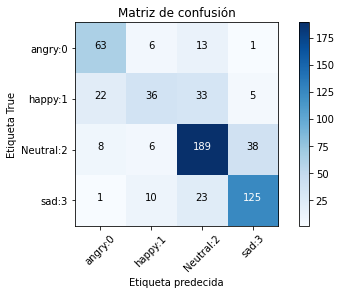

In [16]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')